In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
sns.set_style('white', { 'axes.spines.right': False, 'axes.spines.top': False})
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
from nltk.corpus import stopwords

# load Data

In [2]:
df_meta = pd.read_csv('Oktober2023/key_matrix_20230223_1.csv', sep = ';')
df_meta.reset_index(drop=True, inplace=True)
df_meta

,category,title,subtitle,AB_Testing,Abbruchrate,Advocacy,AIDA,Alleinstellungsmerkmal_USP,Attributionsmodelle,Awareness,...,Shop Software,Social Media,Vertriebskanaele,Testing,Touchpoint,Usability,User Experience,Werbung,Zielgruppensegmentierung,active
0,1,Customer Journey im E-Commerce,Was ist die Customer Journey?,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
1,1,Customer Journey im E-Commerce,Welche Phasen durchlaeuft die Customer Journey?,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,1,Customer Journey im E-Commerce,Was sind Touchpoints und wie werden sie genutzt?,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,1,Customer Journey im E-Commerce,Wie nutzt man eine Customer Journey Map zur Ve...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
4,1,Customer Journey im E-Commerce,Wie kann man Attributionsmodelle einsetzen um ...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
5,1,Customer Journey im E-Commerce,Wie kann die Customer Journey durch A/B-Testin...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
6,1,Zielgruppengerechte Marketingstrategien,Warum muss ich meine Kunden und Kundinnen kennen?,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
7,1,Zielgruppengerechte Marketingstrategien,Wie kann das Kundenbeziehungsmanagement entlan...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
8,1,Zielgruppengerechte Marketingstrategien,Welche Rolle spielen die User Experience und d...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
9,1,Zielgruppengerechte Marketingstrategien,Welche Rolle spielen Buyer Personas beim zielg...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [3]:
cols = ['active'] + [col for col in df_meta.columns if col != 'active']
df_meta = df_meta.reindex(columns=cols)
df_meta = df_meta[df_meta['active'] != 0]
df_meta

,active,category,title,subtitle,AB_Testing,Abbruchrate,Advocacy,AIDA,Alleinstellungsmerkmal_USP,Attributionsmodelle,...,SEO,Shop Software,Social Media,Vertriebskanaele,Testing,Touchpoint,Usability,User Experience,Werbung,Zielgruppensegmentierung
0,1,1,Customer Journey im E-Commerce,Was ist die Customer Journey?,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,1,Customer Journey im E-Commerce,Welche Phasen durchlaeuft die Customer Journey?,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,Customer Journey im E-Commerce,Was sind Touchpoints und wie werden sie genutzt?,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,1,Customer Journey im E-Commerce,Wie nutzt man eine Customer Journey Map zur Ve...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1,1,Customer Journey im E-Commerce,Wie kann man Attributionsmodelle einsetzen um ...,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5,1,1,Customer Journey im E-Commerce,Wie kann die Customer Journey durch A/B-Testin...,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6,1,1,Zielgruppengerechte Marketingstrategien,Warum muss ich meine Kunden und Kundinnen kennen?,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,1,1,Zielgruppengerechte Marketingstrategien,Wie kann das Kundenbeziehungsmanagement entlan...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,1,1,Zielgruppengerechte Marketingstrategien,Welche Rolle spielen die User Experience und d...,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9,1,1,Zielgruppengerechte Marketingstrategien,Welche Rolle spielen Buyer Personas beim zielg...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Data cleaning

In [4]:
# create clear german worlds
# remove unfilled rows

# Data Preparation

In [5]:
df = df_meta.apply(lambda x: [x.name if i==1 else i for i in x]) # lambda Befehl --> Variable X --> [Schritt 3. mach x.name /Schritt 2. wenn i==1 / Schritt 4. sonst i / Schritt 1. für i in x ]
df

,active,category,title,subtitle,AB_Testing,Abbruchrate,Advocacy,AIDA,Alleinstellungsmerkmal_USP,Attributionsmodelle,...,SEO,Shop Software,Social Media,Vertriebskanaele,Testing,Touchpoint,Usability,User Experience,Werbung,Zielgruppensegmentierung
0,active,category,Customer Journey im E-Commerce,Was ist die Customer Journey?,0.0,0.0,0.0,AIDA,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Touchpoint,0.0,0.0,0.0,Zielgruppensegmentierung
1,active,category,Customer Journey im E-Commerce,Welche Phasen durchlaeuft die Customer Journey?,0.0,0.0,Advocacy,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,active,category,Customer Journey im E-Commerce,Was sind Touchpoints und wie werden sie genutzt?,0.0,Abbruchrate,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Touchpoint,0.0,0.0,0.0,0.0
3,active,category,Customer Journey im E-Commerce,Wie nutzt man eine Customer Journey Map zur Ve...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Touchpoint,0.0,User Experience,0.0,0.0
4,active,category,Customer Journey im E-Commerce,Wie kann man Attributionsmodelle einsetzen um ...,0.0,0.0,0.0,0.0,0.0,Attributionsmodelle,...,0.0,0.0,0.0,Vertriebskanaele,0.0,Touchpoint,0.0,0.0,0.0,0.0
5,active,category,Customer Journey im E-Commerce,Wie kann die Customer Journey durch A/B-Testin...,AB_Testing,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Touchpoint,Usability,0.0,0.0,0.0
6,active,category,Zielgruppengerechte Marketingstrategien,Warum muss ich meine Kunden und Kundinnen kennen?,0.0,0.0,0.0,AIDA,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zielgruppensegmentierung
7,active,category,Zielgruppengerechte Marketingstrategien,Wie kann das Kundenbeziehungsmanagement entlan...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zielgruppensegmentierung
8,active,category,Zielgruppengerechte Marketingstrategien,Welche Rolle spielen die User Experience und d...,AB_Testing,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Usability,User Experience,0.0,0.0
9,active,category,Zielgruppengerechte Marketingstrategien,Welche Rolle spielen Buyer Personas beim zielg...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zielgruppensegmentierung


In [6]:
for value in df['category']:
   df =  df.replace('category', 1)
for value in df['active']:
   df =  df.replace('active', 1)
df

,active,category,title,subtitle,AB_Testing,Abbruchrate,Advocacy,AIDA,Alleinstellungsmerkmal_USP,Attributionsmodelle,...,SEO,Shop Software,Social Media,Vertriebskanaele,Testing,Touchpoint,Usability,User Experience,Werbung,Zielgruppensegmentierung
0,1,1,Customer Journey im E-Commerce,Was ist die Customer Journey?,0.0,0.0,0.0,AIDA,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Touchpoint,0.0,0.0,0.0,Zielgruppensegmentierung
1,1,1,Customer Journey im E-Commerce,Welche Phasen durchlaeuft die Customer Journey?,0.0,0.0,Advocacy,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,Customer Journey im E-Commerce,Was sind Touchpoints und wie werden sie genutzt?,0.0,Abbruchrate,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Touchpoint,0.0,0.0,0.0,0.0
3,1,1,Customer Journey im E-Commerce,Wie nutzt man eine Customer Journey Map zur Ve...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Touchpoint,0.0,User Experience,0.0,0.0
4,1,1,Customer Journey im E-Commerce,Wie kann man Attributionsmodelle einsetzen um ...,0.0,0.0,0.0,0.0,0.0,Attributionsmodelle,...,0.0,0.0,0.0,Vertriebskanaele,0.0,Touchpoint,0.0,0.0,0.0,0.0
5,1,1,Customer Journey im E-Commerce,Wie kann die Customer Journey durch A/B-Testin...,AB_Testing,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Touchpoint,Usability,0.0,0.0,0.0
6,1,1,Zielgruppengerechte Marketingstrategien,Warum muss ich meine Kunden und Kundinnen kennen?,0.0,0.0,0.0,AIDA,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zielgruppensegmentierung
7,1,1,Zielgruppengerechte Marketingstrategien,Wie kann das Kundenbeziehungsmanagement entlan...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zielgruppensegmentierung
8,1,1,Zielgruppengerechte Marketingstrategien,Welche Rolle spielen die User Experience und d...,AB_Testing,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Usability,User Experience,0.0,0.0
9,1,1,Zielgruppengerechte Marketingstrategien,Welche Rolle spielen Buyer Personas beim zielg...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zielgruppensegmentierung


In [7]:
col_names = list(df_meta.columns)
col_names.remove('category')
col_names.remove('title')
col_names.remove('subtitle')
col_names.remove('active')
print(col_names)

['AB_Testing', 'Abbruchrate', 'Advocacy', 'AIDA', 'Alleinstellungsmerkmal_USP', 'Attributionsmodelle', 'Awareness', 'Bezahlsysteme', 'bounce rate', 'Buyer persona', 'Chatbot', 'click last', 'click first', 'click & collect', 'Click Through Rate', 'CI', 'CLV (Customer Lifetime Value)', 'Consideration ', 'Contentstrategie', 'Conversions_Kaufabschluss', 'conversions rate', 'CRM (Kundenbindung)', 'Customer Experience', 'Customer Journey', 'Customer Journey Map', 'Datenanalyse', 'Datenschutz', 'Datentracking', 'Design', 'E-Commerce', 'E-Mail-Marketing', 'E-Mail Software', 'google ads', 'heatmap', 'Influencer', 'Informationspflichten', 'Informationsrechte', 'Kaufabbruch', 'Kaufabschluss', 'Kennzahlen', 'key performance indicator KPI', 'keywords', 'Kundengewinnung', 'Kundenkommunikation', 'Kundenverhalten', 'Kundenvertrauen', 'Kundenzufriedenheit', 'Leadgenerierung', 'Livestream Shopping', 'Marke / Brand', 'Marketingbudget', 'Marketingkampagne', 'Marketingstrategie', 'Marketingtools', 'Moment 

In [8]:
df['merged_col'] = df.apply(lambda row: row[row != 0].astype(str).str.cat(sep=', '), axis=1)
df['merged_col'] = df['merged_col'].str.replace(',', '').str.replace('\d+', '').str.replace('(', '').str.replace(')', '').str.replace('?', '').str.lower() #keine Kommas, keine Zahlen
cols = ['merged_col'] + [col for col in df.columns if col != 'merged_col']
df = df.reindex(columns=cols)

# Generate an index column named 'Id'
df = df.set_index(pd.Index(range(0, len(df))))

# Set the name of the index column
df = df.rename_axis('Id')
df['itemId'] = range(0, len(df))
cols = ['itemId'] + [col for col in df.columns if col != 'itemId']
df = df.reindex(columns=cols)
df

<ipython-input-8-85f3231709a9>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['merged_col'] = df['merged_col'].str.replace(',', '').str.replace('\d+', '').str.replace('(', '').str.replace(')', '').str.replace('?', '').str.lower() #keine Kommas, keine Zahlen
<ipython-input-8-85f3231709a9>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['merged_col'] = df['merged_col'].str.replace(',', '').str.replace('\d+', '').str.replace('(', '').str.replace(')', '').str.replace('?', '').str.lower() #keine Kommas, keine Zahlen


,itemId,merged_col,active,category,title,subtitle,AB_Testing,Abbruchrate,Advocacy,AIDA,...,SEO,Shop Software,Social Media,Vertriebskanaele,Testing,Touchpoint,Usability,User Experience,Werbung,Zielgruppensegmentierung
Id,,,,,,,,,,,,,,,,,,,,,
0,0,customer journey im e-commerce was ist die c...,1,1,Customer Journey im E-Commerce,Was ist die Customer Journey?,0.0,0.0,0.0,AIDA,...,0.0,0.0,0.0,0.0,0.0,Touchpoint,0.0,0.0,0.0,Zielgruppensegmentierung
1,1,customer journey im e-commerce welche phasen...,1,1,Customer Journey im E-Commerce,Welche Phasen durchlaeuft die Customer Journey?,0.0,0.0,Advocacy,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,customer journey im e-commerce was sind touc...,1,1,Customer Journey im E-Commerce,Was sind Touchpoints und wie werden sie genutzt?,0.0,Abbruchrate,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Touchpoint,0.0,0.0,0.0,0.0
3,3,customer journey im e-commerce wie nutzt man...,1,1,Customer Journey im E-Commerce,Wie nutzt man eine Customer Journey Map zur Ve...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Touchpoint,0.0,User Experience,0.0,0.0
4,4,customer journey im e-commerce wie kann man ...,1,1,Customer Journey im E-Commerce,Wie kann man Attributionsmodelle einsetzen um ...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Vertriebskanaele,0.0,Touchpoint,0.0,0.0,0.0,0.0
5,5,customer journey im e-commerce wie kann die ...,1,1,Customer Journey im E-Commerce,Wie kann die Customer Journey durch A/B-Testin...,AB_Testing,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Touchpoint,Usability,0.0,0.0,0.0
6,6,zielgruppengerechte marketingstrategien waru...,1,1,Zielgruppengerechte Marketingstrategien,Warum muss ich meine Kunden und Kundinnen kennen?,0.0,0.0,0.0,AIDA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zielgruppensegmentierung
7,7,zielgruppengerechte marketingstrategien wie ...,1,1,Zielgruppengerechte Marketingstrategien,Wie kann das Kundenbeziehungsmanagement entlan...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zielgruppensegmentierung
8,8,zielgruppengerechte marketingstrategien welc...,1,1,Zielgruppengerechte Marketingstrategien,Welche Rolle spielen die User Experience und d...,AB_Testing,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Usability,User Experience,0.0,0.0


In [9]:
df['tag_len'] = df['merged_col'].apply(lambda x: len(x))
cols = ['tag_len'] + [col for col in df.columns if col != 'tag_len']
df = df.reindex(columns=cols)
df

,tag_len,itemId,merged_col,active,category,title,subtitle,AB_Testing,Abbruchrate,Advocacy,...,SEO,Shop Software,Social Media,Vertriebskanaele,Testing,Touchpoint,Usability,User Experience,Werbung,Zielgruppensegmentierung
Id,,,,,,,,,,,,,,,,,,,,,
0,252,0,customer journey im e-commerce was ist die c...,1,1,Customer Journey im E-Commerce,Was ist die Customer Journey?,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Touchpoint,0.0,0.0,0.0,Zielgruppensegmentierung
1,286,1,customer journey im e-commerce welche phasen...,1,1,Customer Journey im E-Commerce,Welche Phasen durchlaeuft die Customer Journey?,0.0,0.0,Advocacy,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,277,2,customer journey im e-commerce was sind touc...,1,1,Customer Journey im E-Commerce,Was sind Touchpoints und wie werden sie genutzt?,0.0,Abbruchrate,0.0,...,0.0,0.0,0.0,0.0,0.0,Touchpoint,0.0,0.0,0.0,0.0
3,305,3,customer journey im e-commerce wie nutzt man...,1,1,Customer Journey im E-Commerce,Wie nutzt man eine Customer Journey Map zur Ve...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Touchpoint,0.0,User Experience,0.0,0.0
4,333,4,customer journey im e-commerce wie kann man ...,1,1,Customer Journey im E-Commerce,Wie kann man Attributionsmodelle einsetzen um ...,0.0,0.0,0.0,...,0.0,0.0,0.0,Vertriebskanaele,0.0,Touchpoint,0.0,0.0,0.0,0.0
5,278,5,customer journey im e-commerce wie kann die ...,1,1,Customer Journey im E-Commerce,Wie kann die Customer Journey durch A/B-Testin...,AB_Testing,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Touchpoint,Usability,0.0,0.0,0.0
6,222,6,zielgruppengerechte marketingstrategien waru...,1,1,Zielgruppengerechte Marketingstrategien,Warum muss ich meine Kunden und Kundinnen kennen?,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zielgruppensegmentierung
7,315,7,zielgruppengerechte marketingstrategien wie ...,1,1,Zielgruppengerechte Marketingstrategien,Wie kann das Kundenbeziehungsmanagement entlan...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zielgruppensegmentierung
8,307,8,zielgruppengerechte marketingstrategien welc...,1,1,Zielgruppengerechte Marketingstrategien,Welche Rolle spielen die User Experience und d...,AB_Testing,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Usability,User Experience,0.0,0.0


In [10]:
item_id = pd.read_csv('Oktober2023/item_ID_oktober2023_export.csv', sep = ';')
item_id.reset_index(drop=True, inplace=True)
item_id

,ref_id,obj_id,description
0,1,1152,Was ist die Customer Journey?
1,1,1193,Was ist die Customer Journey?
2,1,1151,Was ist die Customer Journey?
3,1,1406,Welche Phasen durchlaeuft die Customer Journey?
4,1,1378,Welche Phasen durchlaeuft die Customer Journey?
...,...,...,...
142,1,1391,Welche Social Media-Kanaele sind fuer welche Z...
143,1,1461,Welche Social Media-Kanaele sind fuer welche Z...
144,1,1422,Was muss bei Social Media Advertising beruecks...
145,1,1392,Was muss bei Social Media Advertising beruecks...


In [11]:
# Handle duplicates in item_id
item_id = item_id.groupby('description').agg(list).reset_index()

def flatten(lst):
    while len(lst) > 0 and isinstance(lst[0], list):
        lst = [item for sublist in lst for item in sublist]
    return lst

# Check the structure of lists before flattening
#print("Before Flattening:")
#print(item_id.ref_id.head().apply(lambda x: (type(x), x)))
#print(item_id.obj_id.head().apply(lambda x: (type(x), x)))

# Apply the flatten function
item_id['ref_id'] = item_id['ref_id'].apply(flatten)
item_id['obj_id'] = item_id['obj_id'].apply(flatten)

# Check the structure of lists after flattening
#print("\nAfter Flattening:")
#print(item_id.ref_id.head().apply(lambda x: (type(x), x)))
#print(item_id.obj_id.head().apply(lambda x: (type(x), x)))

# Function to safely get value from a list
def safe_get(lst, idx):
    try:
        return lst[idx]
    except IndexError:
        return None

# Expand the 'ref_id' list into separate columns
item_id['ref_id1'] = [safe_get(x, 0) for x in item_id['ref_id']]
item_id['ref_id2'] = [safe_get(x, 1) for x in item_id['ref_id']]
item_id['ref_id3'] = [safe_get(x, 2) for x in item_id['ref_id']]

# Expand the 'obj_id' list into separate columns
item_id['obj_id1'] = [safe_get(x, 0) for x in item_id['obj_id']]
item_id['obj_id2'] = [safe_get(x, 1) for x in item_id['obj_id']]
item_id['obj_id3'] = [safe_get(x, 2) for x in item_id['obj_id']]

# Drop the original 'ref_id' and 'obj_id' columns
item_id = item_id.drop(columns=['ref_id', 'obj_id'])

# Merge df and item_id (JOIN)
df = pd.merge(df, item_id, left_on='subtitle', right_on='description', how='left')

# Drop the 'description' column as it's no longer needed
df = df.drop(columns='description')

df


,tag_len,itemId,merged_col,active,category,title,subtitle,AB_Testing,Abbruchrate,Advocacy,...,Usability,User Experience,Werbung,Zielgruppensegmentierung,ref_id1,ref_id2,ref_id3,obj_id1,obj_id2,obj_id3
0,252,0,customer journey im e-commerce was ist die c...,1,1,Customer Journey im E-Commerce,Was ist die Customer Journey?,0.0,0.0,0.0,...,0.0,0.0,0.0,Zielgruppensegmentierung,1,1,1,1152,1193,1151
1,286,1,customer journey im e-commerce welche phasen...,1,1,Customer Journey im E-Commerce,Welche Phasen durchlaeuft die Customer Journey?,0.0,0.0,Advocacy,...,0.0,0.0,0.0,0.0,1,1,1,1406,1378,1444
2,277,2,customer journey im e-commerce was sind touc...,1,1,Customer Journey im E-Commerce,Was sind Touchpoints und wie werden sie genutzt?,0.0,Abbruchrate,0.0,...,0.0,0.0,0.0,0.0,1,1,1,1407,1379,1572
3,305,3,customer journey im e-commerce wie nutzt man...,1,1,Customer Journey im E-Commerce,Wie nutzt man eine Customer Journey Map zur Ve...,0.0,0.0,0.0,...,0.0,User Experience,0.0,0.0,1,1,1,1408,1380,1445
4,333,4,customer journey im e-commerce wie kann man ...,1,1,Customer Journey im E-Commerce,Wie kann man Attributionsmodelle einsetzen um ...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,1,1,1294,1381,1446
5,278,5,customer journey im e-commerce wie kann die ...,1,1,Customer Journey im E-Commerce,Wie kann die Customer Journey durch A/B-Testin...,AB_Testing,0.0,0.0,...,Usability,0.0,0.0,0.0,1,1,1,1409,1382,1447
6,222,6,zielgruppengerechte marketingstrategien waru...,1,1,Zielgruppengerechte Marketingstrategien,Warum muss ich meine Kunden und Kundinnen kennen?,0.0,0.0,0.0,...,0.0,0.0,0.0,Zielgruppensegmentierung,1,1,1,1410,1257,1448
7,315,7,zielgruppengerechte marketingstrategien wie ...,1,1,Zielgruppengerechte Marketingstrategien,Wie kann das Kundenbeziehungsmanagement entlan...,0.0,0.0,0.0,...,0.0,0.0,0.0,Zielgruppensegmentierung,1,1,1,1411,1316,1449
8,307,8,zielgruppengerechte marketingstrategien welc...,1,1,Zielgruppengerechte Marketingstrategien,Welche Rolle spielen die User Experience und d...,AB_Testing,0.0,0.0,...,Usability,User Experience,0.0,0.0,1,1,1,1412,1384,1450
9,231,9,zielgruppengerechte marketingstrategien welc...,1,1,Zielgruppengerechte Marketingstrategien,Welche Rolle spielen Buyer Personas beim zielg...,0.0,0.0,0.0,...,0.0,0.0,0.0,Zielgruppensegmentierung,1,1,1,1413,1385,1451


(0.0, 500.0)

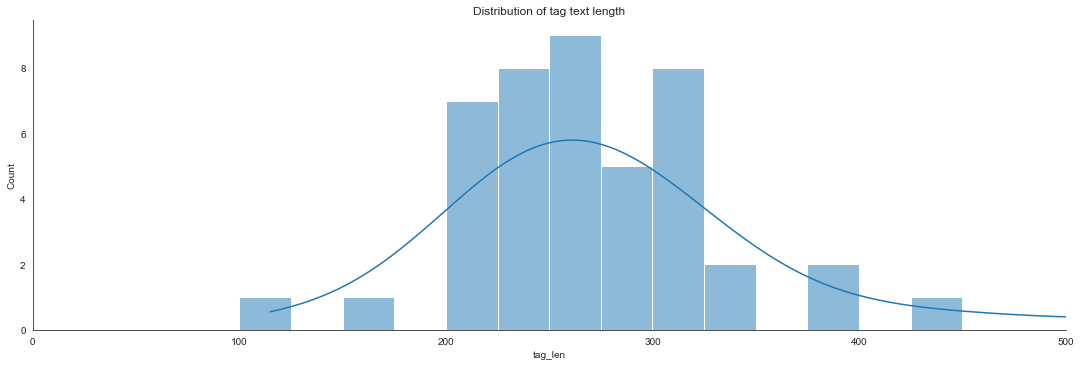

In [12]:
# illustrate the tag text length
sns.displot(data=df.dropna(), bins=list(range(0, 500, 25)), height=5, x='tag_len', aspect=3, kde=True)
plt.title('Distribution of tag text length')
plt.xlim([0, 500])

In [13]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')

# set a custom stop list from nltk
stop = stopwords.words('german')
manual_stopwords = ['beachten', 'bedeutung', 'beeinflusst', 'beim', 'beruecksichtigen',
 'beruecksichtigt', 'beste', 'chatboots', 'dabei', 'fuer', 'funktioniert', 'genutzt', 'hole', 'inwieweit', 'kennen', 'koennen', 'nutzen', 'nutzt', 'muessen', 'of', 'off', 'on', 'schaerfen', 'sem', 'seoder', 'spielen', 'spielt']

# create the tfid vectorizer, alternatively you can also use countVectorizer
tfidf =  TfidfVectorizer(max_features=250, analyzer = 'word', stop_words=stop)
vectorized_data = tfidf.fit_transform(df['merged_col'])
count_matrix = pd.DataFrame(vectorized_data.toarray(), index=df['merged_col'].index.tolist())

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samtoorchi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
#each single words has a own column on the matrix and the rows are the items
count_matrix.head(80)

,0,1,2,3,4,5,6,7,8,9,...,197,198,199,200,201,202,203,204,205,206
0,0.000000,0.000000,0.243613,0.000000,0.000000,0.000000,0.243613,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.128383,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.189868,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.229337,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.188065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.238098
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.274265,0.000000,0.000000,0.000000,...,0.37146,0.000000,0.000000,0.000000,0.000000,0.000000,0.274265,0.000000,0.144537,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.256847,0.000000,0.135358,0.000000
8,0.139275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.185554,0.000000,0.000000,0.176327
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.251535,0.340675,0.132558,0.000000


In [15]:
# print feature names
print(tfidf.get_feature_names_out())
print(len(tfidf.get_feature_names_out()))

['ab_testing' 'abbruchrate' 'ads' 'advertising' 'advocacy' 'after' 'aida'
 'akquisition' 'alleinstellungsmerkmal_usp' 'analyse' 'analysiert'
 'anbieters' 'anzeigen' 'aspekte' 'attributionsmodelle' 'aufgebaut'
 'aussehen' 'awareness' 'beachten' 'bearbeitung' 'bedeutung'
 'beeinflussen' 'beeinflusst' 'beim' 'beruecksichtigen' 'beruecksichtigt'
 'beste' 'bestellprozess' 'bestellvorgangs' 'bewertungsportale'
 'bezahlsystem' 'bezahlsysteme' 'bezahlungsprozess' 'bezahlvorgang'
 'bounce' 'brand' 'buyer' 'chatboots' 'chatbot' 'ci' 'click' 'clv'
 'collect' 'commerce' 'consideration' 'content' 'contentstrategie'
 'conversions' 'conversions_kaufabschluss' 'couponing' 'crm' 'customer'
 'dabei' 'daten' 'datenanalyse' 'datenschutz' 'datenschutzrechtlich'
 'datentracking' 'design' 'direkt' 'durchlaeuft' 'einfuehrung' 'einsetzen'
 'entlang' 'erfolg' 'erzielen' 'experience' 'first' 'fuer' 'funktioniert'
 'genutzt' 'geschaeftserfolg' 'gesetzliche' 'gestaltet' 'gestaltung'
 'google' 'grundlagen' 'haendle

In [16]:
# reduce dimensionality for improved performance
svd = TruncatedSVD(n_components=50)
reduced_data = svd.fit_transform(count_matrix)

In [17]:
# compute the cosine similarity matrix
similarity = cosine_similarity(reduced_data)
similarity

array([[1.        , 0.5723349 , 0.5308308 , ..., 0.23018143, 0.11425678,
        0.30160765],
       [0.5723349 , 1.        , 0.63179498, ..., 0.28355406, 0.05464856,
        0.39172439],
       [0.5308308 , 0.63179498, 1.        , ..., 0.23358877, 0.04153336,
        0.34222863],
       ...,
       [0.23018143, 0.28355406, 0.23358877, ..., 1.        , 0.17176089,
        0.40147644],
       [0.11425678, 0.05464856, 0.04153336, ..., 0.17176089, 1.        ,
        0.20503321],
       [0.30160765, 0.39172439, 0.34222863, ..., 0.40147644, 0.20503321,
        1.        ]])

In [18]:
# visualize the results
def show_results(movie_name, top_titles_df):
    movie_index = df[df.itemId==movie_name].subtitle
    top_titles_df = top_titles_df.sort_values(by='sim_scores', ascending=False)
    fix, ax = plt.subplots(figsize=(11, 5))
    sns.barplot(data=top_titles_df, y='subtitle', x= 'sim_scores', color='blue')
    plt.xlim((0,1))
    plt.title(f'Top 15 recommendations for {movie_index}')
    pct_values = ['{:.2}'.format(elm) for elm in list(top_titles_df['sim_scores'])]
    ax.bar_label(container=ax.containers[0], labels=pct_values, size=12)

item index:  [17]
                                             subtitle  category  ref_id3  \
18  Was muss bei der Gestaltung von E-Mails zu Mar...         2        1   
16  Was ist beim Versand von Newslettern datenschu...         2        1   
41                          Test  Kundenkommunikation         2        1   
21  Wie hilft eine Landing-Page dabei Kaufabschlue...         2        1   
22  Welche Bedeutung hat die Webseite des Anbieter...         2        1   
25  Wie kann Couponing die Kaufentscheidung beeinf...         2        1   
44                                     Test  Services         2        1   
42                                  Test  Online Shop         2        1   
26  Was muessen Online-Haendler bei der Gestaltung...         2        1   
28  Inwieweit kann durch Chatboots die Kaufentsche...         2        1   
24           Wie kann der Warenkorb optimiert werden?         2        1   
27  Welche Bedeutung haben Bewertungsportale als T...         2       

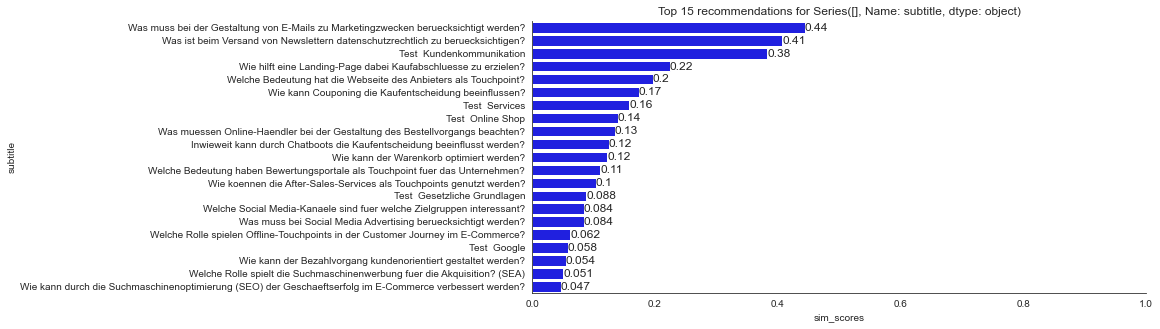

In [19]:
# create a function that takes in movie title as input and returns a list of the most similar movies

#get Data from DataFrame
def get_top_titles_and_categories(df, movie_indices, mediaPref):
    # extract the 'subtitle' and 'category' columns from the DataFrame
    top_titles_df = pd.DataFrame(df.iloc[movie_indices]['subtitle'])
    top_categories_df = pd.DataFrame(df.iloc[movie_indices]['category'])
    top_ref_id_df = pd.DataFrame(df.iloc[movie_indices][f'ref_id{mediaPref}'])
    top_obj_id_df = pd.DataFrame(df.iloc[movie_indices][f'obj_id{mediaPref}'])


    # concatenate the data frames horizontally
    result_df = pd.concat([top_titles_df, top_categories_df, top_ref_id_df, top_obj_id_df], axis=1)

    return result_df


def get_recommendations(item_name, mediaPref,  level, n, done_list_ref_id, cosine_sim=similarity):

    # If 'item_name' is None, select a random 'item_index' where 'level' equals 'category'
    if not done_list_ref_id:
        item_index = df[df.category == level].sample(1).index.tolist()
    else:
        # get the index of the item that matches the title

#        item_index = df[(df.ref_id1 == item_name) |
#                          (df.ref_id2 == item_name) |
#                          (df.ref_id3 == item_name)].index.tolist()
  # get the index of the item that matches the title
        #item_index = df[df[f'ref_id{mediaPref}'] == item_name].index.tolist() #for ref_id
        #################item_index = df[df[f'obj_id{mediaPref}'] == item_name].index.tolist()
        item_index = df[(df[f'obj_id1'] == item_name) |
                (df[f'obj_id2'] == item_name) |
                (df[f'obj_id3'] == item_name)].index.tolist()

        if not item_index:
            return None, None, "404"


    print('item index: ',item_index)


    # get the pairwsie similarity scores of all movies with that movie and sort the movies based on the similarity scores
    #sim_scores_all = sorted(list(enumerate(cosine_sim[item_index])), key=lambda x: x[1], reverse=True)[1:]
    # will be always only one single value in the list xxxxD
    sim_scores_all = []
    for item_index in item_index:
        sim_scores_all += sorted(list(enumerate(cosine_sim[item_index])),
                                 key=lambda x: x[1], reverse=True)[1:]

    movie_indices = [i[0] for i in sim_scores_all]
    scores = [i[1] for i in sim_scores_all]

    # return the top n most similar movies from the movies df
    result_df = get_top_titles_and_categories(df, movie_indices, mediaPref)
    result_df['sim_scores'] = scores
    result_df['ranking'] = range(1, len(result_df) + 1)


    done_list_ref_idComplete = get_id_info(df, done_list_ref_id)

    #filtering by level
    if level < 3:
        result_df = result_df.loc[df['category'] == level, :]

    # Remove rows from the result DataFrame where ref_id is found in any of the ref_id columns
    #result_df = result_df[~result_df['ref_id1'].isin(done_list_ref_id) &
    #                  ~result_df['ref_id2'].isin(done_list_ref_id) &
    #                  ~result_df['ref_id3'].isin(done_list_ref_id)]
   # result_df = result_df[~result_df[f'ref_id{mediaPref}'].isin(done_list_ref_idComplete)] # for ref_id
    result_df = result_df[~result_df[f'obj_id{mediaPref}'].isin(done_list_ref_idComplete)]




       # If len of result_df is less than 5, grab results from level 3
    # If len of result_df is less than 5, increment level by 1 and grab results until level 3
    while len(result_df) < 5 and level < 3:
        level += 1
        additional_result_df, additional_sim_scores_all, _ = get_recommendations(item_name, mediaPref,  level, n, done_list_ref_idComplete, cosine_sim)
        result_df = pd.concat([result_df, additional_result_df])
        sim_scores_all += additional_sim_scores_all

    # sort the DataFrame by 'sim_scores' in descending order
    result_df = result_df.sort_values(by='sim_scores', ascending=False)

    print(result_df)
    return result_df, sim_scores_all, "success"

def get_id_info(df, done_list_ref_id):
    # Columns we are interested in
    columns = ['ref_id1', 'ref_id2', 'ref_id3', 'obj_id1', 'obj_id2', 'obj_id3']
    # Create an empty DataFrame to store results
    result_info = pd.DataFrame(columns=columns)
    # Iterate through done_list_ref_id
    for id_value in done_list_ref_id:
        # For each ID, get rows where the ID is found in the columns of interest
        id_df = df[df[columns].apply(lambda row: id_value in row.values, axis=1)][columns]
        result_info = pd.concat([result_info, id_df], ignore_index=True)
    # Flatten the DataFrame into a list
    result_list = result_info.values.flatten().tolist()
    #print(result_list)
    return result_list



# generate a list of recommendations for a specific movie title
mediaPref = 3  #new order: 1:text, 2:audio, 3:video
item_name = None #obj_id of latest interaction / else: None
number_of_recommendations = 5
level = 2
done_list_ref_id = [] #use here the object_id's, e.g. 1460 exists, 123 not exists
#1445, , 1465, 1780


#check for valid obj_ids
valid_ids = df[['obj_id1', 'obj_id2', 'obj_id3']].values.flatten() # Extract valid IDs from DataFrame
done_list_ref_id = [id_ for id_ in done_list_ref_id if id_ in valid_ids] # Filter out IDs not found in the DataFrame
# If item_name isn't set (None), default to the last ID in done_list_ref_id
if not item_name and done_list_ref_id:
    item_name = done_list_ref_id[-1]

# If the chosen item_name isn't in the DataFrame, go back in the done_list_ref_id until we find a valid one
while done_list_ref_id and item_name not in valid_ids:
    done_list_ref_id.pop()  # remove the last element
    item_name = done_list_ref_id[-1] if done_list_ref_id else None

result_df, _, error_code = get_recommendations(item_name, mediaPref, level, number_of_recommendations, done_list_ref_id)
if result_df is None:
    print("Error:", error_code)
    # Handle this error, e.g., exit the script or continue with another logic
else:
    show_results(item_name, result_df)
#ErrorCode //toAdd


#show_results(item_name, result_df)

#learn path as Array; String with propebility of matches

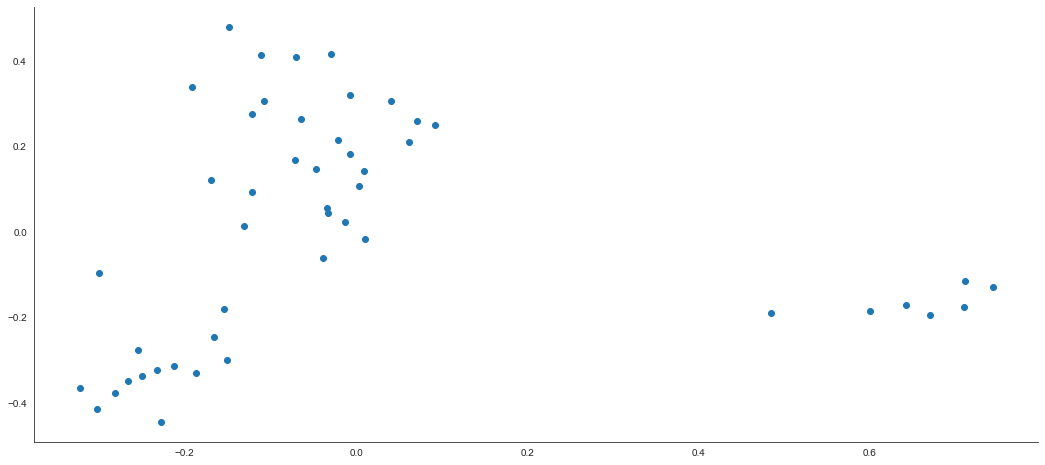

In [20]:
from sklearn.decomposition import PCA #Principal component analysis

tfidf_matrix_array = count_matrix.values

# perform PCA to reduce dimensionality to 2
pca = PCA(n_components=2)
pca_matrix = pca.fit_transform(tfidf_matrix_array)

# plot the resulting vectors in a scatter plot
plt.figure(figsize=(18,8))
plt.scatter(pca_matrix[:, 0], pca_matrix[:, 1])

plt.show()

#X-Achse: MLE
#Y-Achse: features as group of information created by pca --> linear combination

In [21]:
import joblib

# Save the model
joblib.dump(reduced_data, 'tfidf_model.pkl')

['tfidf_model.pkl']

In [22]:
df.to_pickle('my_dataframe.pkl')